## 1. Import Libraries & Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
! pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=ea887481fdbc4ae02389de0626948b61abafe81f2038f0212fdb4bfc91bedcbe
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

100%|██████████| 368k/368k [00:00<00:00, 31.9MB/s]

Extracting files...


In [5]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [7]:
import os
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['credit_risk_dataset.csv']


In [8]:
import os
file_path = os.path.join(path, "credit_risk_dataset.csv")
data = pd.read_csv(file_path)
data.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# 2. Data Visualization

In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
data.shape[1]

12

### Correlation

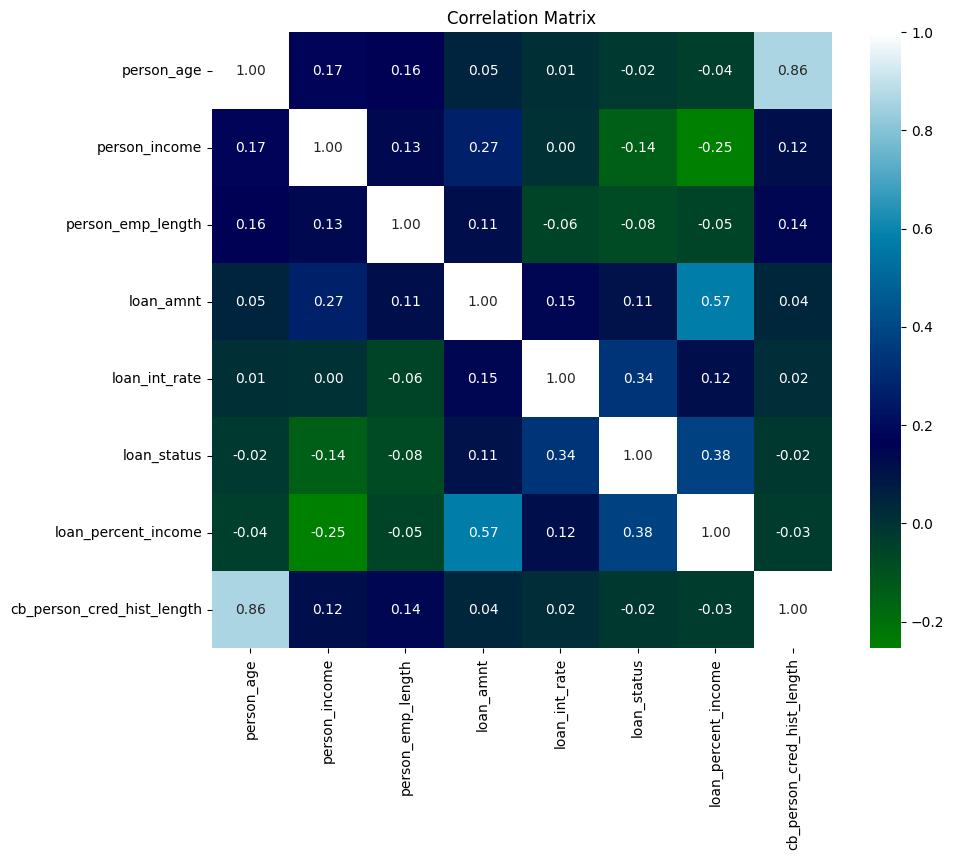

In [11]:
numeric_df = data.select_dtypes(include=['float64', 'int64','Int8', 'Int16', 'Int32','double'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='ocean', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
threshold = 0.3

# Mask for correlations greater than the threshold (excluding 1.0)
high_corr = (corr_matrix.abs() > threshold) & (corr_matrix != 1.0)

# Extract feature pairs and their correlation values
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iat[i, j])
                   for i in range(len(corr_matrix.columns))
                   for j in range(i+1, len(corr_matrix.columns))
                   if high_corr.iat[i, j]]
high_corr_pairs

[('person_age', 'cb_person_cred_hist_length', 0.8591331885974023),
 ('loan_amnt', 'loan_percent_income', 0.5726115283260329),
 ('loan_int_rate', 'loan_status', 0.3351326114498812),
 ('loan_status', 'loan_percent_income', 0.37936646846126054)]

In [13]:
# strong positive correlation between person_age and cb_person_cred_hist_length
# positive correlation between loan_status and loan_int_rate
# positive correlation between loan_status and loan_percent_income
# good positive correlation between loan_amnt and loan_percent_income

### person_age and cb_person_cred_hist_length

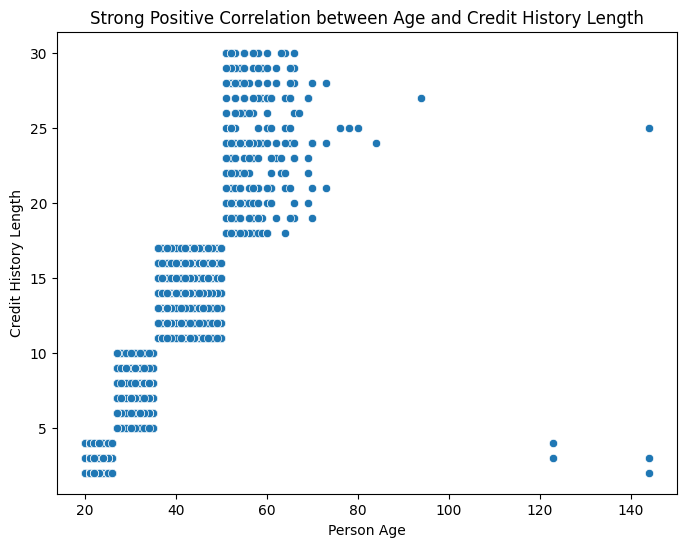

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='person_age', y='cb_person_cred_hist_length')

# Adding labels and title
plt.title('Strong Positive Correlation between Age and Credit History Length')
plt.xlabel('Person Age')
plt.ylabel('Credit History Length')

# Show plot
plt.show()

In [15]:
# Outliers in person age with age>120
# the older the person, the longer the credit history length

In [16]:
data['person_age'].agg(['min', 'max', 'mean', 'median'])


,person_age
min,20.0000
max,144.0000
mean,27.7346
median,26.0000


<ipython-input-17-3e4a9c918379>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('age_group')['cb_person_cred_hist_length'].mean()


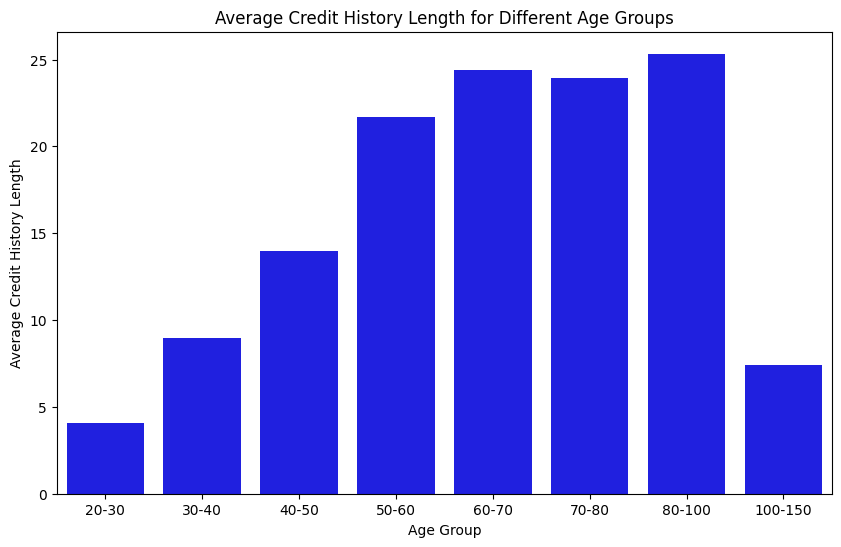

In [17]:
df = data
bins = [20, 30, 40, 50, 60, 70, 80, 100, 150]  # Adjust bins as necessary
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-150']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the mean of credit history length
age_grouped = df.groupby('age_group')['cb_person_cred_hist_length'].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_grouped.index, y=age_grouped.values, color='Blue')

# Adding labels and title
plt.title('Average Credit History Length for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Credit History Length')

# Show plot
plt.show()

### loan_amnt and loan_percent_income

In [18]:
display(data['loan_amnt'].head())
display(data['loan_percent_income'].head())

,loan_amnt
0,35000
1,1000
2,5500
3,35000
4,35000


,loan_percent_income
0,0.59
1,0.10
2,0.57
3,0.53
4,0.55


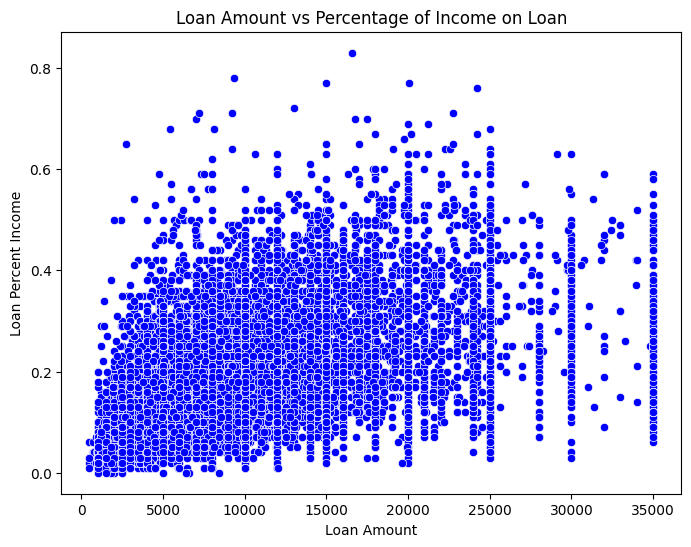

In [19]:
plt.figure(figsize=(8, 6))

# Scatter plot for loan_amnt vs loan_percent_income
sns.scatterplot(x=df['loan_amnt'], y=df['loan_percent_income'], color='b')

# Adding labels and title
plt.title('Loan Amount vs Percentage of Income on Loan')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Percent Income')

# Show plot
plt.show()


In [20]:
# The majority of points lie upto 25000 loan amount and loan % income as 50%

<ipython-input-21-ae154055903d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby('loan_amount_grp')['loan_percent_income'].mean()


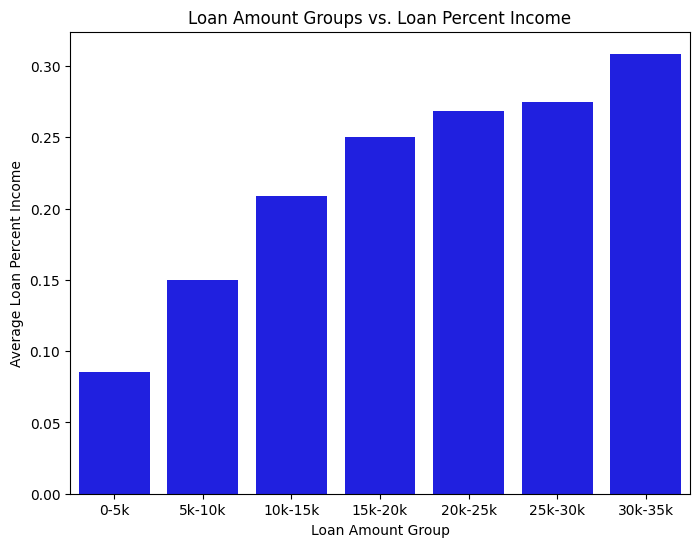

In [21]:
# Define bins and labels for loan amount groups
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']

# Create a new column for loan amount groups
df['loan_amount_grp'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, right=False)

# Group by loan amount groups and calculate the mean of loan_percent_income
grp = df.groupby('loan_amount_grp')['loan_percent_income'].mean()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=grp.index, y=grp.values, color='blue')

# Adding labels and title
plt.title('Loan Amount Groups vs. Loan Percent Income')
plt.xlabel('Loan Amount Group')
plt.ylabel('Average Loan Percent Income')

# Show plot
plt.show()


### loan_status and loan_int_rate

In [22]:
display(data['loan_status'].unique())
print("")
display(data['loan_int_rate'].head())

array([1, 0])

,loan_int_rate
0,16.02
1,11.14
2,12.87
3,15.23
4,14.27


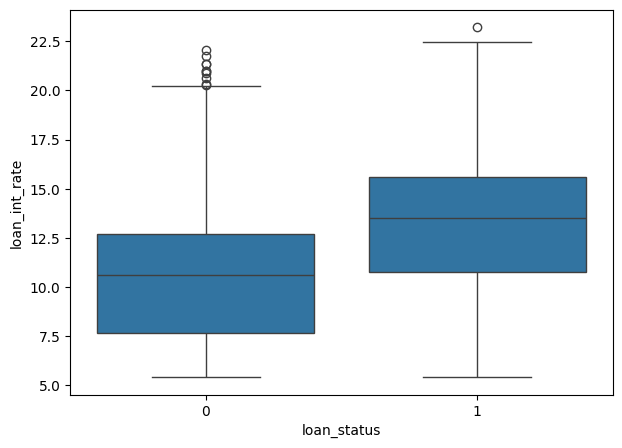

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df);

In [24]:
# The non default loans are in the loan interest rate between 7.5-12.5% and some above 20%
# The default loans are having higher loan interest rate

# 0 typically represents "non-default" or "not defaulted" (i.e., the loan is not in default).
# 1 typically represents "default" (i.e., the loan has gone into default)

# a default loan is a loan where the borrower has failed to meet the repayment obligations,
# and the lender considers it unlikely to recover the debt under the original terms.
# It often leads to serious financial consequences for the borrower.

# 1 = Default: This means the borrower has failed to meet their repayment obligations, and the loan is in default.
# 0 = Non-default (Not in default): This typically means that the borrower is up to date on their payments or the loan is in good standing.

### loan_status and loan_percent_income

In [25]:
display(data['loan_percent_income'].head())

,loan_percent_income
0,0.59
1,0.10
2,0.57
3,0.53
4,0.55


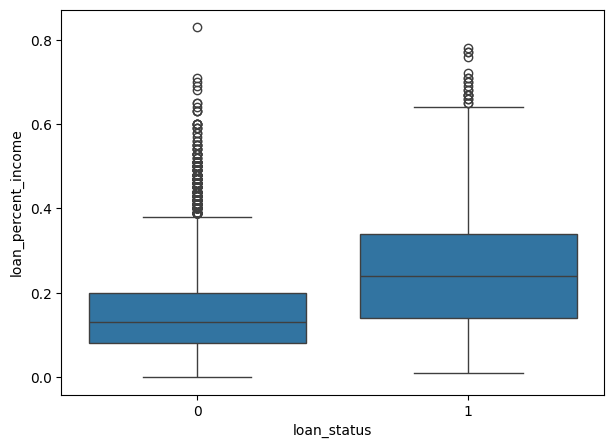

In [26]:
#view the correlation between loan_status and loan_percent_income as a boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df);

In [27]:
# The non default loans have a lower loan to income percentage, as expected,
# however, there are also some data points as higher loan to income percentages.

# The default loans have data points at slighter higher loan to income percentage and the range of these percentages is larger
# than non default loans.

## Loan Grade

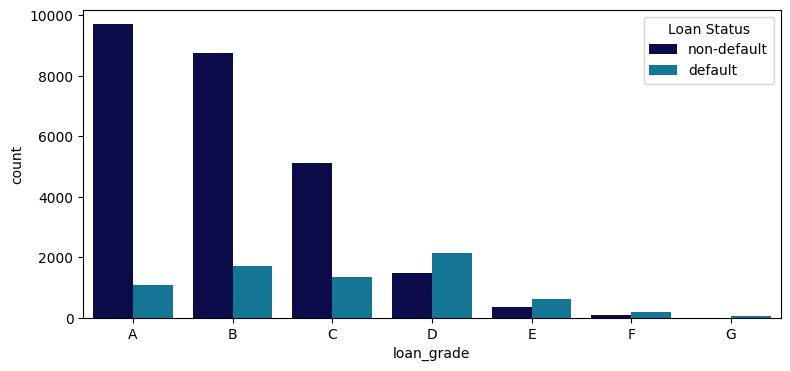

In [30]:
# Visualize the number of non-default and default loans by loan grade
plt.figure(figsize=(9, 4))
ax = sns.countplot(x='loan_grade', data=df, order=sorted(df['loan_grade'].unique()),
                   hue='loan_status', palette='ocean')

# Modify the legend labels to display 'non default' and 'default'
ax.legend(title='Loan Status', labels=['non-default', 'default'])

# Display the plot
plt.show()


In [31]:
# Most defaults are in grade range A-D

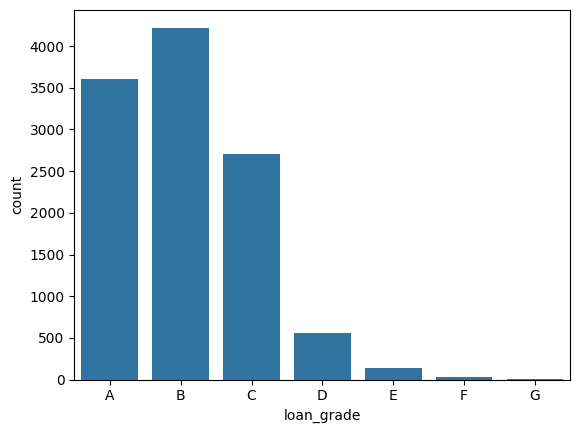

In [43]:
# Filter the dataframe where person_home_ownership is 'RENT' and loan defaulted
rent_defaulted_df = df[(df['person_home_ownership'] == 'RENT')&(df['loan_status']==0)]

# View the loan_grade for the filtered dataframe
sns.countplot(x='loan_grade', order=sorted(df['loan_grade'].unique()), data=rent_defaulted_df);

## person_home_ownership

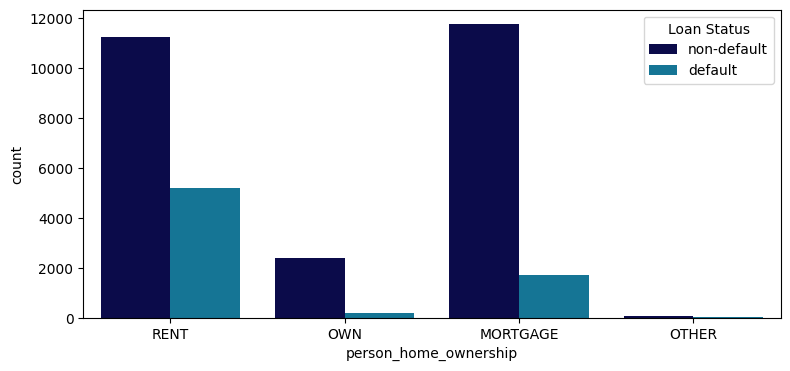

In [36]:
# Visualize the number of non-default and default loans by loan grade
plt.figure(figsize=(9, 4))
ax = sns.countplot(x='person_home_ownership', data=df,
                   hue='loan_status', palette='ocean')

# Modify the legend labels to display 'non default' and 'default'
ax.legend(title='Loan Status', labels=['non-default', 'default'])

# Display the plot
plt.show()


In [37]:
# The majority default lones are renters

## Loan intent

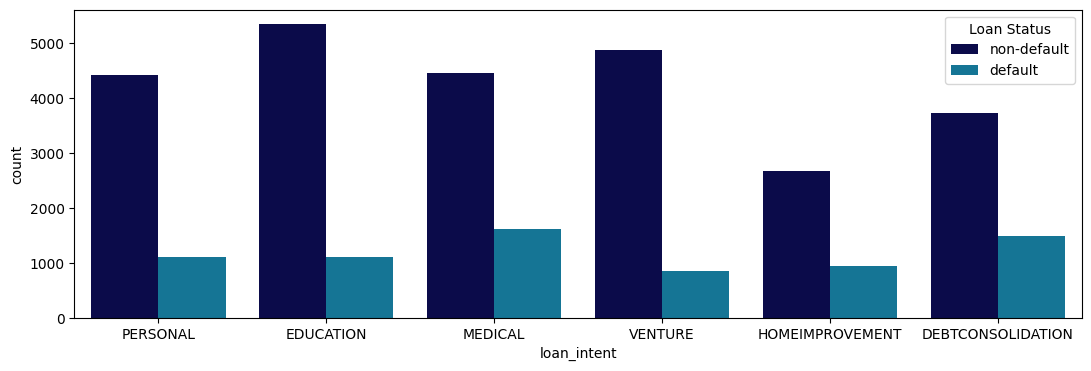

In [40]:
# Visualize the number of non-default and default loans by loan grade
plt.figure(figsize=(13, 4))
ax = sns.countplot(x='loan_intent', data=df,
                   hue='loan_status', palette='ocean')

# Modify the legend labels to display 'non default' and 'default'
ax.legend(title='Loan Status', labels=['non-default', 'default'])

# Display the plot
plt.show()


## Loan Grade Percentage

In [42]:
# Calculate the percentage of each loan grade
loan_grade_percentages_df = rent_defaulted_df['loan_grade'].value_counts(normalize=True) * 100

# Convert to a DataFrame for better readability and reset the index
loan_grade_percentages_df = loan_grade_percentages_df.reset_index()
loan_grade_percentages_df.columns = ['loan_grade', 'percentage']

# Display the percentages
loan_grade_percentages_df


,loan_grade,percentage
0,B,37.515550
1,A,32.006398
2,C,24.080327
3,D,4.922694
4,E,1.217345
5,F,0.248800
6,G,0.008886


In [ ]:
# The A, B, and C grades make up a substantial portion of the loans

## cb_preson_cred_hist_length & cb_person_default_on_file

1.   List item
2.   List item



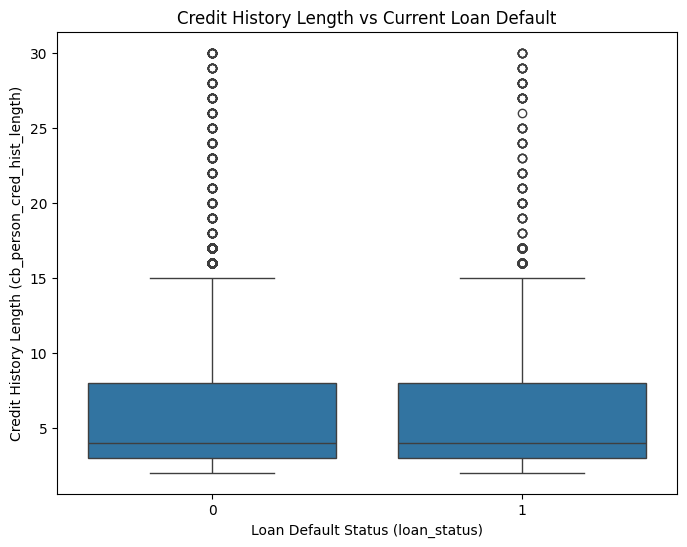

In [54]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df)

# Adding labels and title
plt.title("Credit History Length vs Current Loan Default")
plt.xlabel('Loan Default Status (loan_status)')
plt.ylabel('Credit History Length (cb_person_cred_hist_length)')

# Show the plot
plt.show()

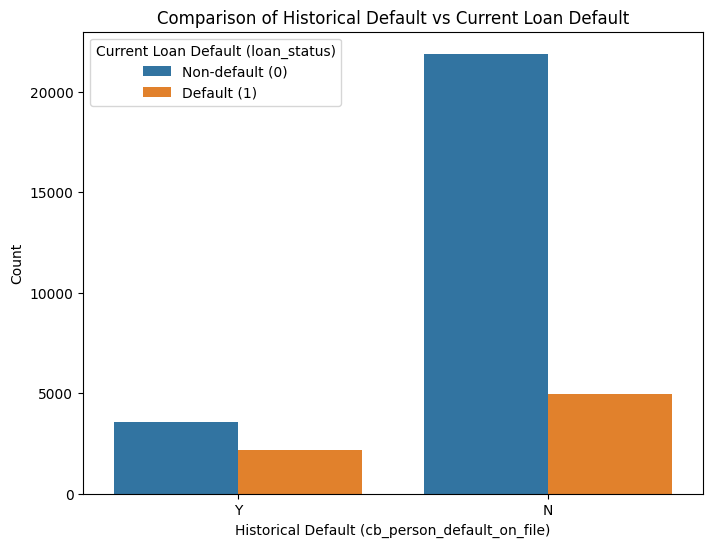

In [52]:
# Plotting the barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df)

# Adding labels and title
plt.title("Comparison of Historical Default vs Current Loan Default")
plt.xlabel('Historical Default (cb_person_default_on_file)')
plt.ylabel('Count')
plt.legend(title="Current Loan Default (loan_status)", labels=["Non-default (0)", "Default (1)"])

# Show the plot
plt.show()